In [1]:
# Import necessary libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
# Set visualization style

In [55]:
# sns.set(style="whitegrid")
# %matplotlib inline

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot with a red line and blue markers
plt.plot(x, y, color='red', marker='o', linestyle='-', markersize=5, markerfacecolor='blue')


In [56]:
# 1. Read the dataset

In [57]:
file_path = 'C:/Users/iYomi/Downloads/DSML/purchase_data_exe.csv'
df = pd.read_csv(file_path)

In [58]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN


In [59]:
# 2. Basic Exploratory Data Analysis

In [60]:
# Display information about the dataset (data types, non-null counts, etc.)
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    24999 non-null  object 
 1   customer_id             24999 non-null  int64  
 2   product_category        24999 non-null  int64  
 3   payment_method          24999 non-null  object 
 4   value [USD]             24999 non-null  float64
 5   time_on_site [Minutes]  24999 non-null  float64
 6   clicks_in_site          24999 non-null  int64  
 7   Unnamed: 7              0 non-null      float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB


In [61]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,customer_id,product_category,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,0.0
mean,35047.126765,507.918797,203.248763,73.132649,16.039642,NaN
std,14448.792961,4.288552,208.015747,150.983919,13.396365,NaN
min,10000.000000,501.000000,0.000000,2.000000,0.000000,NaN
25%,22500.000000,504.000000,57.170000,13.300000,8.000000,NaN
50%,35184.000000,508.000000,136.720000,24.100000,11.000000,NaN
75%,47468.000000,512.000000,278.815000,43.000000,19.000000,NaN
max,59998.000000,515.000000,2177.040000,655.000000,167.000000,NaN


In [62]:
# Check for missing values in each column
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


date                          0
customer_id                   0
product_category              0
payment_method                0
value [USD]                   0
time_on_site [Minutes]        0
clicks_in_site                0
Unnamed: 7                24999
dtype: int64

In [63]:
# 3. Data Cleaning (if necessary)
# For demonstration, let's drop rows with missing values.
# df_cleaned = df.dropna()
# print("\nData shape after dropping missing values:", df_cleaned.shape)

In [64]:
# 4. Visualizations


Numeric columns found: ['customer_id', 'product_category', 'value [USD]', 'time_on_site [Minutes]', 'clicks_in_site', 'Unnamed: 7']


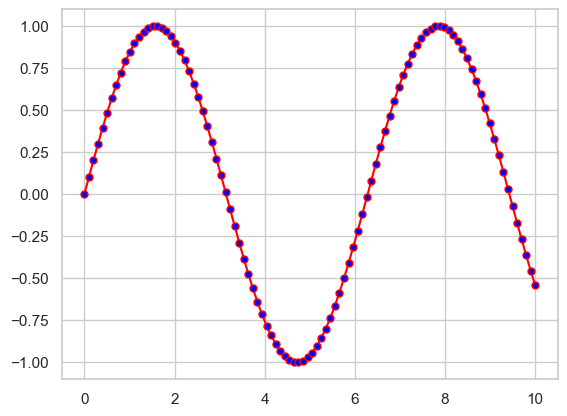

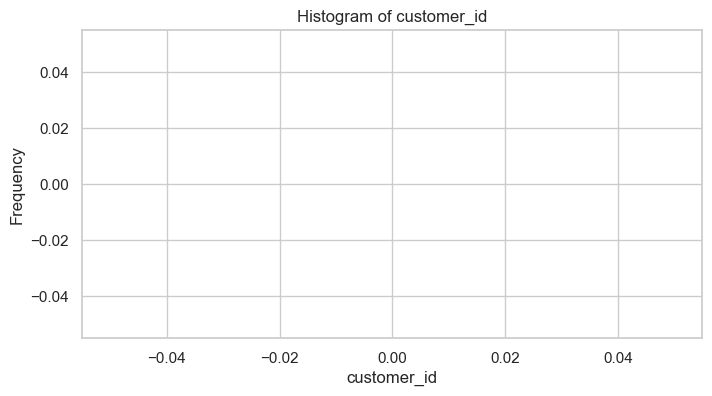

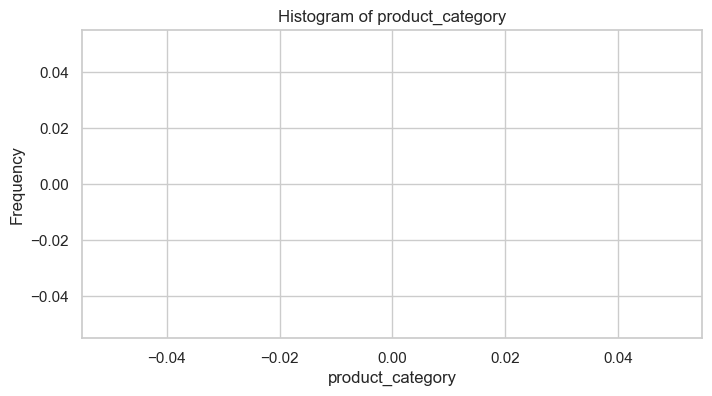

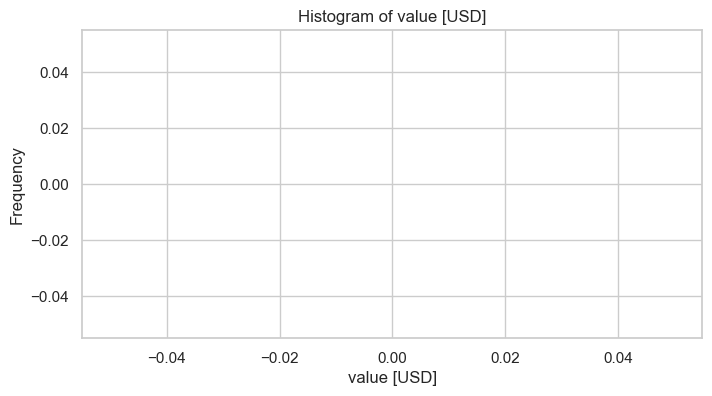

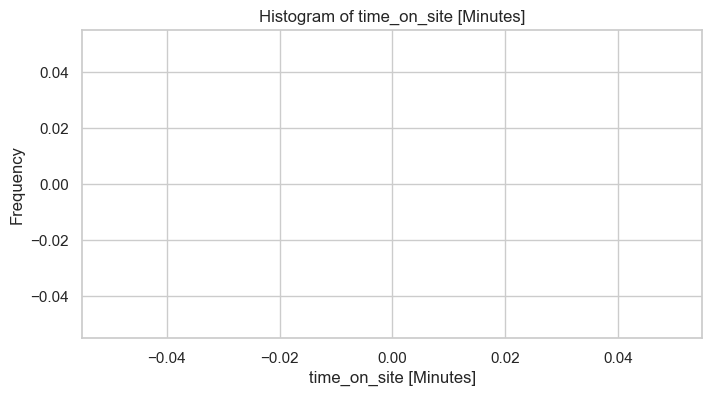

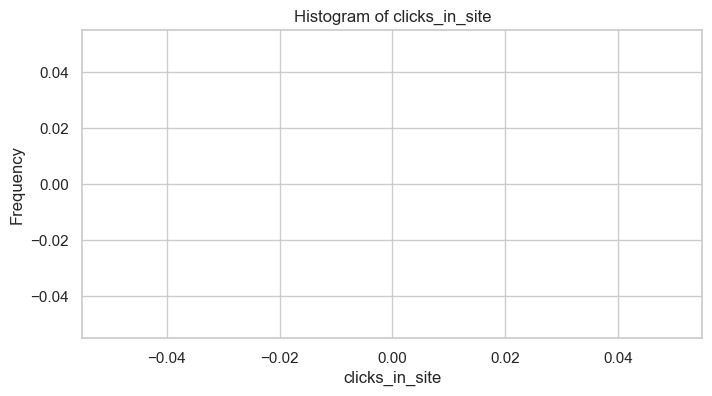

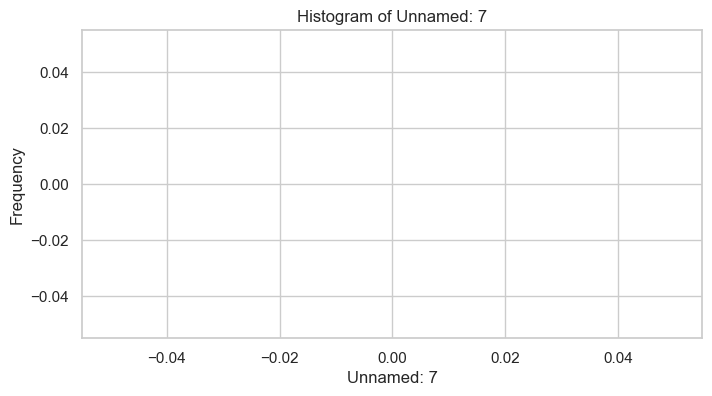

In [65]:
## 4.1 Histograms for Numeric Variables
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns.tolist()
print("\nNumeric columns found:", numeric_columns)

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

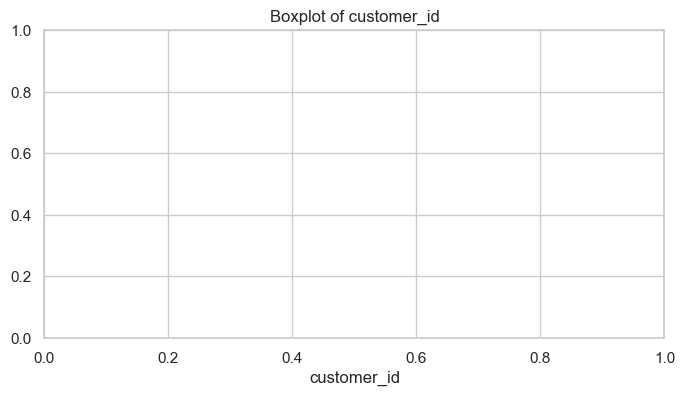

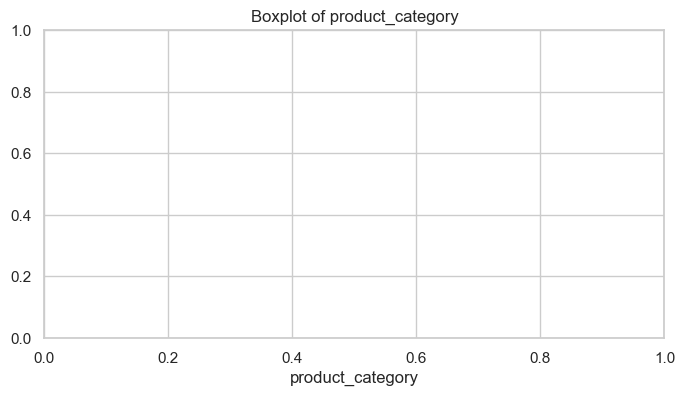

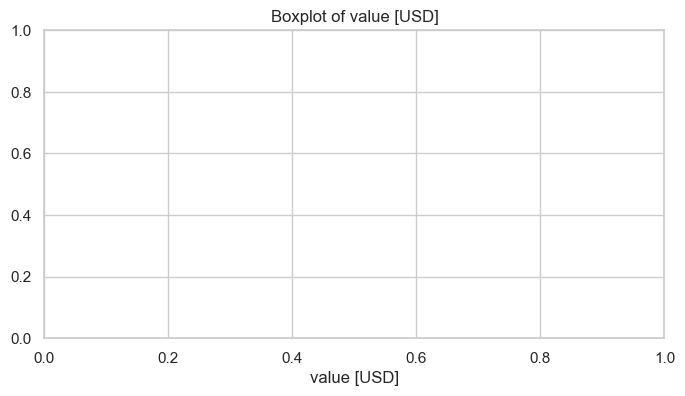

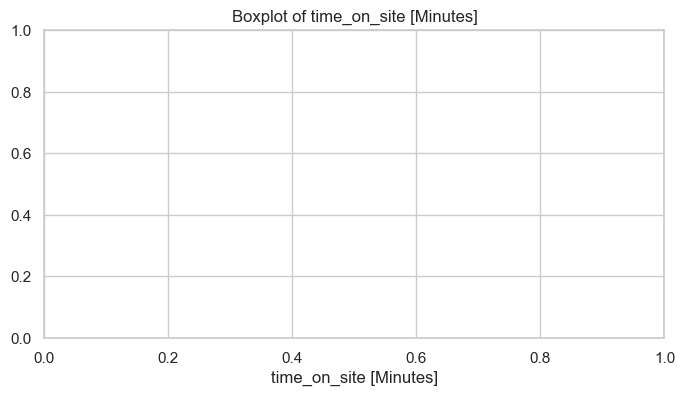

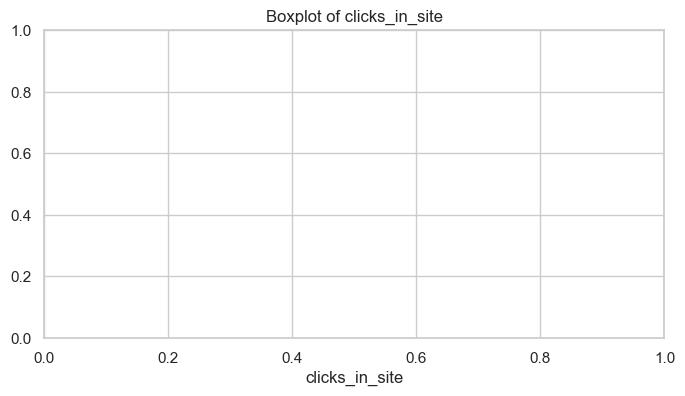

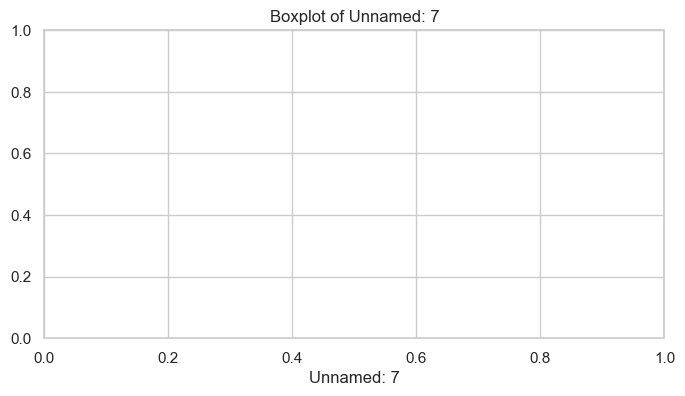

In [66]:
## 4.2 Boxplots for Numeric Variables (to check for outliers)
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


Categorical columns found: ['date', 'payment_method']


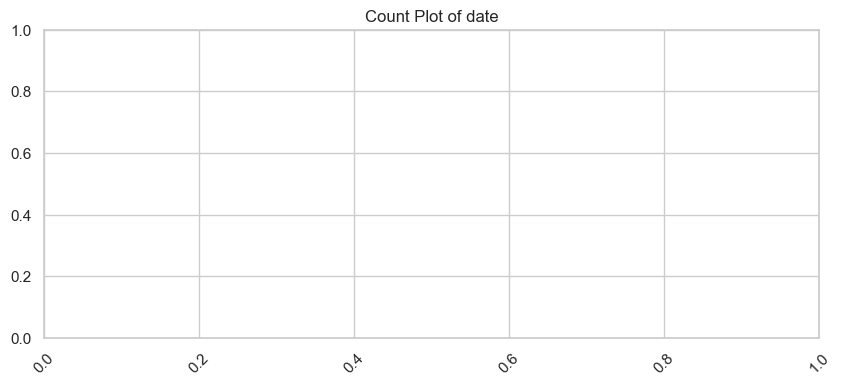

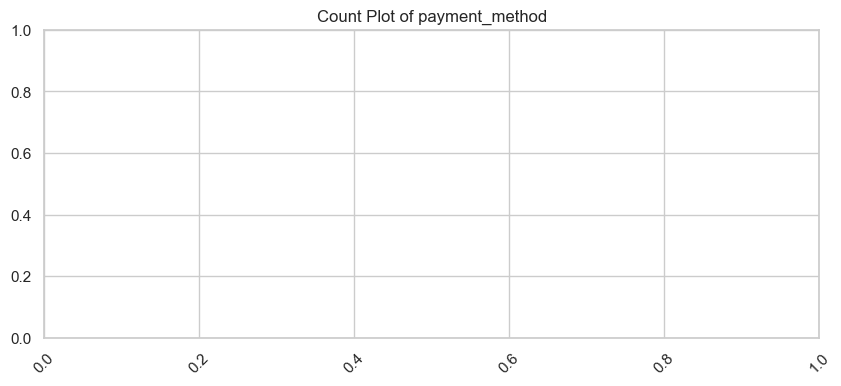

In [67]:
## 4.3 Countplots for Categorical Variables
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns found:", categorical_columns)

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\iYomi\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\iYomi\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


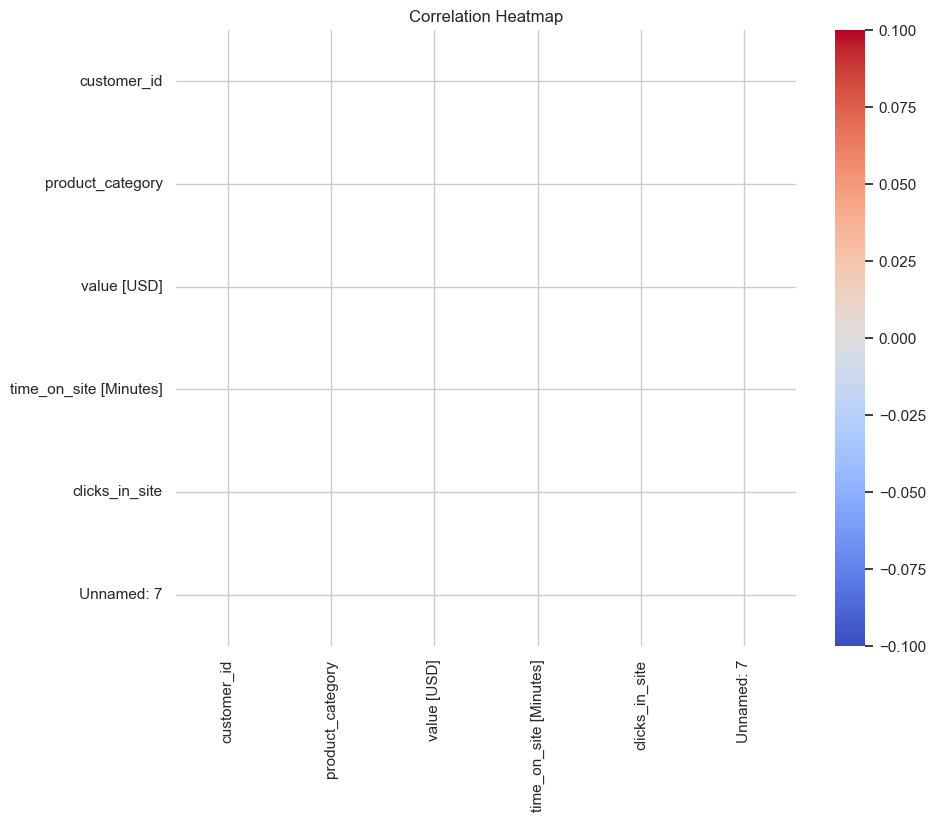

In [68]:
## 4.4 Correlation Heatmap for Numeric Variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()